In [4]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import sklearn.metrics as m
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
df = pd.read_csv('spam.txt')

In [24]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [26]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
label=df.iloc[:,[0]]['target']

In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.shape

(5169, 2)

In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

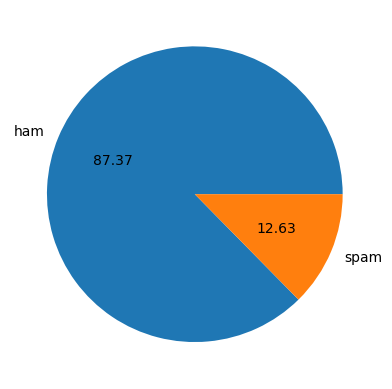

In [13]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [41]:
msg=df.iloc[:,[1]]['text']
msg

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will  _ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [32]:
import re

In [33]:
len(set(stopwords.words('english')))

179

In [34]:
lemma=WordNetLemmatizer()

In [42]:
sentences=[]
for sen in msg:
  senti=re.sub('[^A-Za-z]',' ',sen)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[lemma.lemmatize(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  sentences.append(senti)

In [43]:
sentences

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv=CountVectorizer(max_features=6000)

In [46]:
features=cv.fit_transform(sentences)

In [47]:
features=features.toarray()

In [48]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
feature_train,feature_test,label_train,label_test=train_test_split(features,label,test_size=0.2,random_state=7)

# Logistic Regression

In [58]:
model=LogisticRegression()
model.fit(feature_train,label_train)

LogisticRegression()

In [59]:
label_pred=model.predict(feature_test)

In [60]:
m.accuracy_score(label_test,label_pred)

0.9856502242152466

In [61]:
label_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
label_test

83      0
2235    0
2746    0
246     0
3120    0
       ..
2460    0
2661    0
2086    0
5126    0
2886    0
Name: target, Length: 1115, dtype: int32

In [63]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.99      0.90      0.94       145

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [64]:
print(m.confusion_matrix(label_test,label_pred))

[[969   1]
 [ 15 130]]
